In [570]:
import csv
import re
import html
import csv
import nltk
from csv import writer
from ast import literal_eval
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import WordNetLemmatizer
%matplotlib inline

#combine N weeks to a single file
def genCombinedFile():
  outputfile = open('combinedFiles.csv', 'w')
  my_file1=open('week2_labelled_tweets2.csv', 'r')
  my_file2=open('week1_labelled_tweets2.csv', 'r')

  for row in my_file1:
        row=row.replace('"', '')
        outputfile.write(row)
  for row in my_file2:
        row=row.replace('"', '')
        outputfile.write(row)

genCombinedFile()

In [571]:
#Load dataframe for test and training data
def ppLoadToDF(file):
  DATASET_COLUMNS=['polarity','tweet_Id','date','text1','text2','text3','text4','text5']
  DATASET_ENCODING = "ISO-8859-1"
  df = pd.read_csv(file, header = None, names=DATASET_COLUMNS, quoting=csv.QUOTE_NONE)
  return df

df = ppLoadToDF('combinedFiles.csv')
df.shape[0]
df.head(5)

polarity             tweet_Id                      date  \
0        0  1462978021288288256  2021-11-23T02:55:15.000Z   
1        0  1462978095439388674  2021-11-23T02:55:33.000Z   
2        0  1462978123247534080  2021-11-23T02:55:40.000Z   
3        1  1462978165878394886  2021-11-23T02:55:50.000Z   
4        1  1462978259759644680  2021-11-23T02:56:12.000Z   

                                               text1  \
0  RT @TheRickyDavila: Since President Biden was ...   
1  @idkMUFC @N09434002 @KhalidAslamSYM @N09434002...   
2  RT @lucyfig513: Can\u2019t believe these last ...   
3  Tune in now to watch Amy continue to rep Oakla...   
4  @halfmarathonman @Jeopardy Millennia of evolut...   

                                               text2 text3 text4 text5  
0   both seditious white supremacists Ted Cruz an...   NaN   NaN   NaN  
1                                                NaN   NaN   NaN   NaN  
2                                                NaN   NaN   NaN   NaN  
3                                                NaN   NaN   NaN   NaN  
4   and you\u2019ve chosen to use all of that to ...   NaN   NaN   NaN

In [572]:
#Load dataframe for any data
def ppAnyLoadToDF(file):
  DATASET_COLUMNS=['tweet_Id','date','text1','text2','text3','text4','text5']
  DATASET_ENCODING = "ISO-8859-1"
  df = pd.read_csv(file, header = None, names=DATASET_COLUMNS, quoting=csv.QUOTE_NONE)
  return df

In [573]:
def ppCombineToFullLen(df):
  #preprocess-combine multiple columns of tweets to full length tweets
  df['fulltweet'] = df['text1'].fillna('').fillna('NaN').map(str) + '' + df['text2'].fillna('').fillna('NaN').map(str) + '' + df['text3'].fillna('').fillna('NaN').map(str)+ ''+ df['text4'].fillna('').fillna('NaN').map(str)+ '' + df['text5'].fillna('').fillna('NaN').map(str)
  #dropping multiple columns of tweets after combining into fulltweet
  df.drop(['text1','text2','text3','text4','text5'], axis=1, inplace=True)
  df.sample(5)
  return df

df = ppCombineToFullLen(df)
df.sample(5)

polarity             tweet_Id                      date  \
2071        1  1459361048755064833  2021-11-13T03:22:42.000Z   
1020        0  1459360029316890631  2021-11-13T03:18:39.000Z   
396         0  1463706512333934593  2021-11-25T03:10:01.000Z   
1315        0  1459356879692382210  2021-11-13T03:06:08.000Z   
907         0  1459358173857341444  2021-11-13T03:11:16.000Z   

                                              fulltweet  
2071  @levarburton @TiffanyDCross @Jeopardy https://...  
1020  RT @Albay3037: @jgwritesnovels @JessSFrankel \...  
396   RT @Jeopardy: Here are some Will SHORTZ clues ...  
1315  RT @levarburton: You can keep my name out of @...  
907   RT @levarburton: You can keep my name out of @...

# Analytics and Preparing Data

In [574]:
def ppAddPreLen(df):
  df['pre_length'] = df['fulltweet'].apply(lambda x: len(x))

ppAddPreLen(df)

In [575]:
#check data types
print(df.dtypes)
print(df[df['polarity'].isnull()])

polarity      object
tweet_Id       int64
date          object
fulltweet     object
pre_length     int64
dtype: object
Empty DataFrame
Columns: [polarity, tweet_Id, date, fulltweet, pre_length]
Index: []


In [576]:
#convert polarity to integer
def convertPolToInt(df):
  df['polarity'] = pd.to_numeric(df['polarity'], errors='coerce')
  df = df.dropna(subset=['polarity'])
  df['polarity'] = df['polarity'].astype(int)

ppConvertPolToInt(df)


/Users/c-ksood/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [577]:
df['polarity'].value_counts()

0.0    1311
1.0     918
Name: polarity, dtype: int64

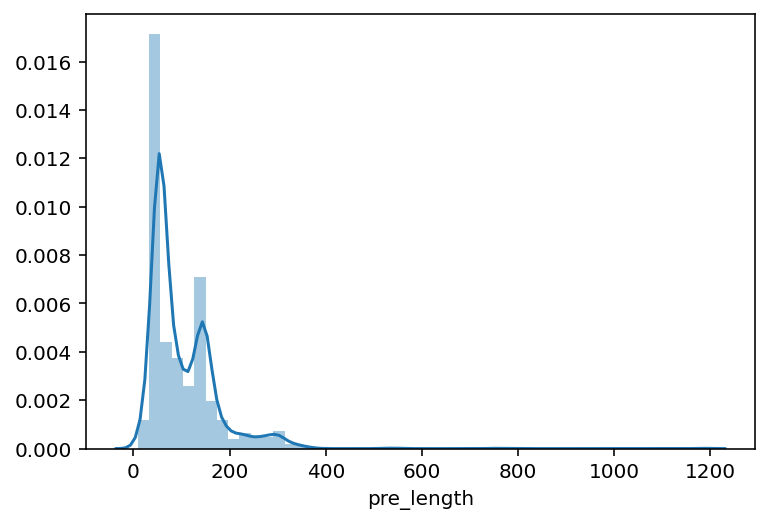

In [578]:
sns.distplot(df['pre_length'])

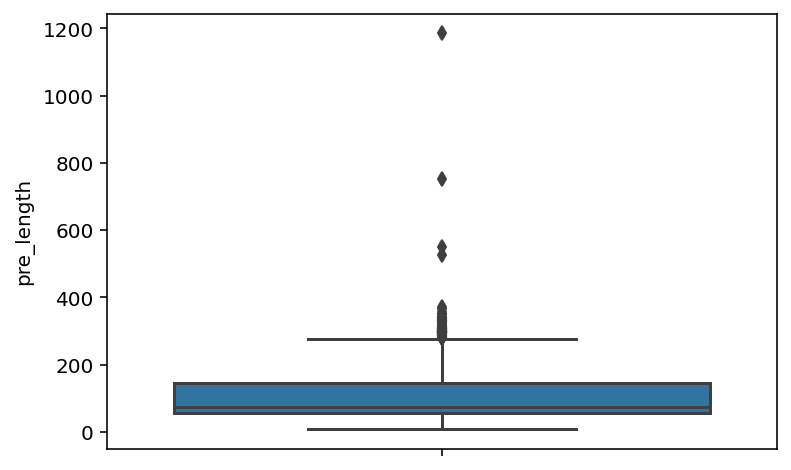

In [579]:
sns.boxplot(y='pre_length', data=df)

In [580]:
df[df['pre_length']>400]

polarity             tweet_Id                      date  \
61        0.0  1462983822492983301  2021-11-23T03:18:18.000Z   
70        0.0  1462984374266343427  2021-11-23T03:20:30.000Z   
485       0.0  1464066445306998796  2021-11-26T03:00:16.000Z   
487       0.0  1464066535052484608  2021-11-26T03:00:37.000Z   

                                             fulltweet  pre_length  
61   @DannaAMPond @MatPatGT @CordyPatrick @dawkosga...         526  
70   @DannaAMPond @MatPatGT @CordyPatrick @dawkosga...         753  
485  https://t.co/IZJAJ1hwir\n\n\u0633\u0628\u062d\...        1185  
487  RT @jamaloman: https://t.co/IZJAJ1hwir\n\n\u06...         549

There are few that more than 400 characters long. We need to clean the data.

Text(0.5, 0.98, 'Length via each Sentiment')

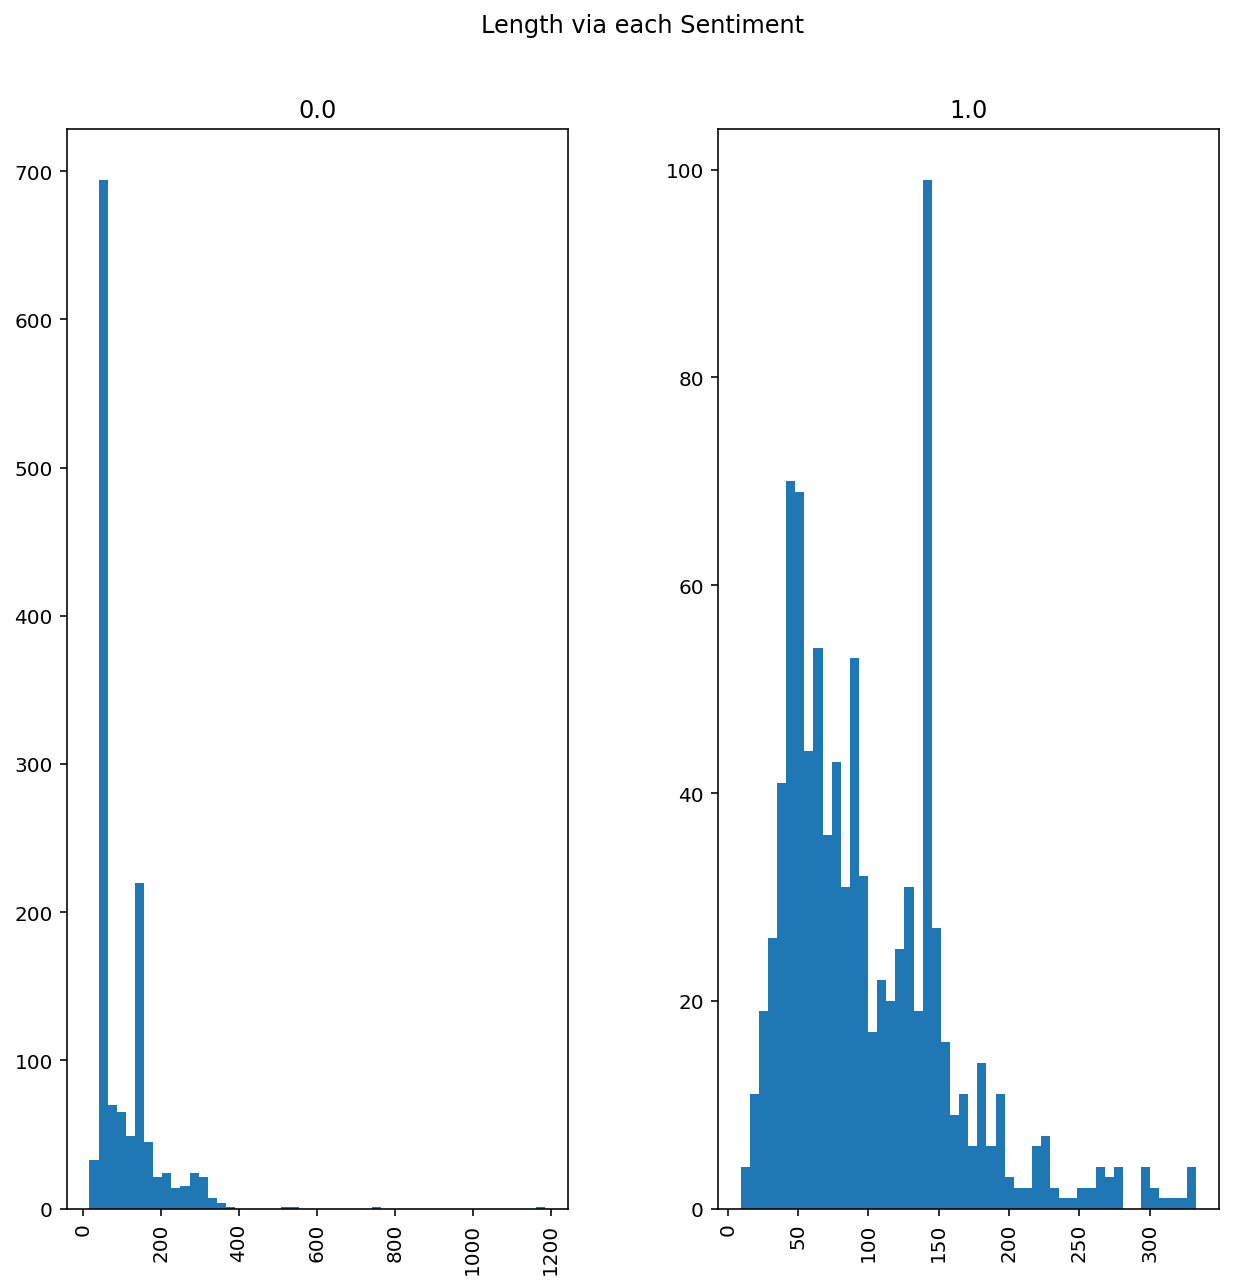

In [581]:
ax = df.hist(column = 'pre_length', by = 'polarity', bins = 50 , figsize = (10,10));
pl.suptitle('Length via each Sentiment') 

From these plots you can see that there are a lot of negative reviews that have lengths greater than 100.

In [582]:
data_positive = df[df['polarity'] == 1]
data_negative = df[df['polarity'] == 0]

In [583]:
dataset = pd.concat([data_positive, data_negative])
dataset.head()

polarity             tweet_Id                      date  \
3       1.0  1462978165878394886  2021-11-23T02:55:50.000Z   
4       1.0  1462978259759644680  2021-11-23T02:56:12.000Z   
5       1.0  1462978417138225157  2021-11-23T02:56:50.000Z   
6       1.0  1462978492887277580  2021-11-23T02:57:08.000Z   
7       1.0  1462978509819756549  2021-11-23T02:57:12.000Z   

                                           fulltweet  pre_length  
3  Tune in now to watch Amy continue to rep Oakla...          95  
4  @halfmarathonman @Jeopardy Millennia of evolut...         256  
5  The latest My Playful News! https://t.co/n9Lig...          95  
6  if i were on jeopardy and didn\u2019t make it ...          94  
7  @AmodioMatt Thanks for replying Jeopardy champ...          55

In [584]:
data_positive = df[df['polarity'] == 1]
data_negative = df[df['polarity'] == 0]

dataset = pd.concat([data_positive, data_negative])

# Start data cleaning

In [585]:
#Removing punctuations
def ppRemovePunct(df):
  import string
  english_punctuations = string.punctuation
  punctuations_list = english_punctuations

  def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

  df['fulltweet']= dataset['fulltweet'].apply(lambda x: cleaning_punctuations(x))
  df['fulltweet'].tail()

  return dataset

df = ppRemovePunct(df)
df.head()

polarity             tweet_Id                      date  \
3       1.0  1462978165878394886  2021-11-23T02:55:50.000Z   
4       1.0  1462978259759644680  2021-11-23T02:56:12.000Z   
5       1.0  1462978417138225157  2021-11-23T02:56:50.000Z   
6       1.0  1462978492887277580  2021-11-23T02:57:08.000Z   
7       1.0  1462978509819756549  2021-11-23T02:57:12.000Z   

                                           fulltweet  pre_length  
3  Tune in now to watch Amy continue to rep Oakla...          95  
4  @halfmarathonman @Jeopardy Millennia of evolut...         256  
5  The latest My Playful News! https://t.co/n9Lig...          95  
6  if i were on jeopardy and didn\u2019t make it ...          94  
7  @AmodioMatt Thanks for replying Jeopardy champ...          55

# HTML Decoding

In [586]:
df['fulltweet'][705]

'@Jeopardy why did the lady not also get $2000 in tonight\\u2019s episode? She &amp; he were tied. Why?'

# URLs

In [587]:
df['fulltweet'][36]

'Final Jeopardy !: \\u201c20TH CENTURY PRESIDENTS\\u201d (22/11/21) | DANGER! \\u2013\\xa0Danger! https://t.co/FVXTFqg5Pc'

# Mentions

In [588]:
df['fulltweet'][704]

'Six weeks\\u2019 worth of @Jeopardy wins to go for @Jeopardamy to catch @AmodioMatt \\u2014 I wanna see her do it. She\\u2019s got the knowledge instinct and the speed!'

# Hashtags

In [589]:
df['fulltweet'][719]

"RT @WIONews: #India's cricket tour in jeopardy as South Africa likely to suspend all sports due to new COVID-19 variant\\n\\n#OmicronVariant #C\\u2026"

# Data Cleaning

In [590]:
from nltk.tokenize import TreebankWordTokenizer

In [591]:
token = TreebankWordTokenizer()

In [592]:
def ppAllCleanTweets(df):
  nltk.download('wordnet')
  mentions = r'@[A-Za-z0-9]+'
  url_https = 'https?://[A-Za-z0-9./]+'
  url_www = r'www.[^ ]+'

  negations = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
             "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
             "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
             "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
             "mustn't":"must not"
            }

  stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves','jeopardy','rt']

  def tweet_cleaning(fulltweet):
    fulltweet = html.unescape(fulltweet)
    fulltweet = re.sub(mentions, '', fulltweet)
    fulltweet = re.sub(url_https, '', fulltweet)
    tefulltweetxt = re.sub(url_www, '', fulltweet)
    fulltweet = fulltweet.lower()
    for a, b in negations.items():
        if a in fulltweet:
            fulltweet = fulltweet.replace(a,b)
    #Removing characters except letters
    fulltweet = re.sub("[^a-zA-Z]", " ", fulltweet)
    #Removing unnecessary white spaces using tokenizer
    word_list = token.tokenize(fulltweet)
    fulltweet = " ".join(word_list).strip()
    return fulltweet
  
  df['fulltweet'] = df['fulltweet'].apply(lambda x: tweet_cleaning(x)) 
  
  #removing stopwords
  STOPWORDS = set(stopwordlist)
  def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
  
  df['fulltweet'] = df['fulltweet'].apply(lambda x: cleaning_stopwords(x))
  
  #stemming- Stemming refers to the process of normalization, 
  #where we reduce a word to its base stem, for example, “automate”, “automatic”, “automation,” “automations” 
  #will be reduced to “automat” such that all these forms refer to automat.
  st = nltk.PorterStemmer()
  def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
  df['fulltweet']= df['fulltweet'].apply(lambda x: stemming_on_text(x))
  
  #lemmatize- Lemmatization on the other hand usually refers to doing things properly 
  #with the use of a vocabulary and morphological analysis, normally aiming to remove 
  #inflectional endings only and to return the dictionary form of a word.
  lm = nltk.WordNetLemmatizer()
  def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
  df['fulltweet'] = df['fulltweet'].apply(lambda x: lemmatizer_on_text(x))
  print('cleaned tweets-removed urls,mentions,hashtags,negations,stopwords,lemmatized data, stemming done!')

ppAllCleanTweets(df)
df['fulltweet'].head()

[nltk_data] Downloading package wordnet to /Users/c-ksood/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


cleaned tweets-removed urls,mentions,hashtags,negations,stopwords,lemmatized data, stemming done!


3             tune watch amy continue rep oakland week
4    millennia evolution technological development ...
5      latest playful news thanks thejeopardyfan funko
6              didn u make final absolutely would kill
7                        thanks replying champion matt
Name: fulltweet, dtype: object

In [593]:
df.drop(['pre_length'], axis=1, inplace=True)

In [594]:
df.head()

polarity             tweet_Id                      date  \
3       1.0  1462978165878394886  2021-11-23T02:55:50.000Z   
4       1.0  1462978259759644680  2021-11-23T02:56:12.000Z   
5       1.0  1462978417138225157  2021-11-23T02:56:50.000Z   
6       1.0  1462978492887277580  2021-11-23T02:57:08.000Z   
7       1.0  1462978509819756549  2021-11-23T02:57:12.000Z   

                                           fulltweet  
3           tune watch amy continue rep oakland week  
4  millennia evolution technological development ...  
5    latest playful news thanks thejeopardyfan funko  
6            didn u make final absolutely would kill  
7                      thanks replying champion matt

In [595]:
df.to_csv('preprocessed_tweets_combined.csv', encoding='utf-8')

In [596]:
def plotNegativeCloud(df, term_used):
    negative_tweets = df[df[term_used]== 0]
    neg_tweet = []
    for tweet in negative_tweets.fulltweet:
        neg_tweet.append(tweet)
    neg_tweet = pd.Series(neg_tweet).str.cat(sep = ' ')

    neg_wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_tweet)
    plt.figure(figsize=(12,10))
    plt.imshow(neg_wordcloud, interpolation="bilinear")
    plt.axis("off")
    print('plot word cloud of Negative tweets')
    plt.show()

In [597]:
def plotPositiveCloud(df, term_used):
    positive_tweets = df[df[term_used]== 1]

    pos_tweet = []
    for tweet in positive_tweets.fulltweet:
        pos_tweet.append(tweet)
    pos_tweet = pd.Series(pos_tweet).str.cat(sep = ' ')

    pos_wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(pos_tweet)
    plt.figure(figsize=(12,10))
    plt.imshow(pos_wordcloud, interpolation="bilinear")
    plt.axis("off")
    print('plot word cloud of Positive tweets')
    plt.show()

plot word cloud of Negative tweets


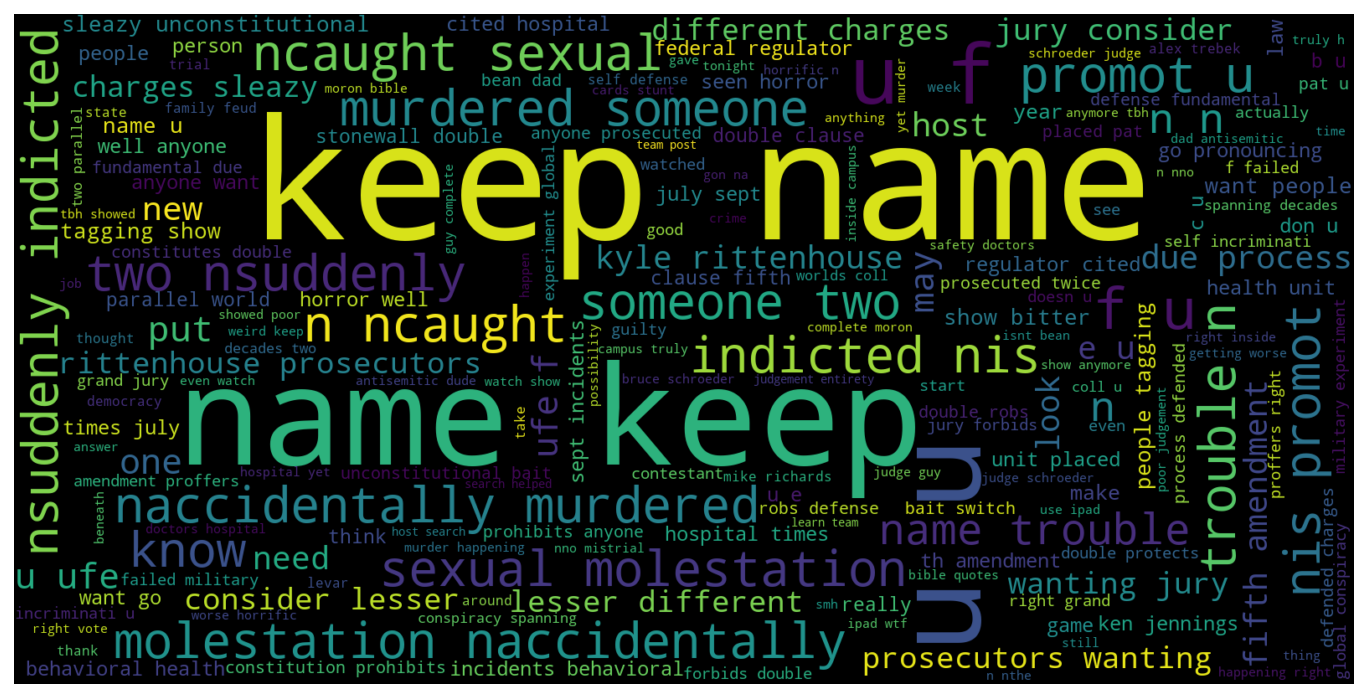

plot word cloud of Positive tweets


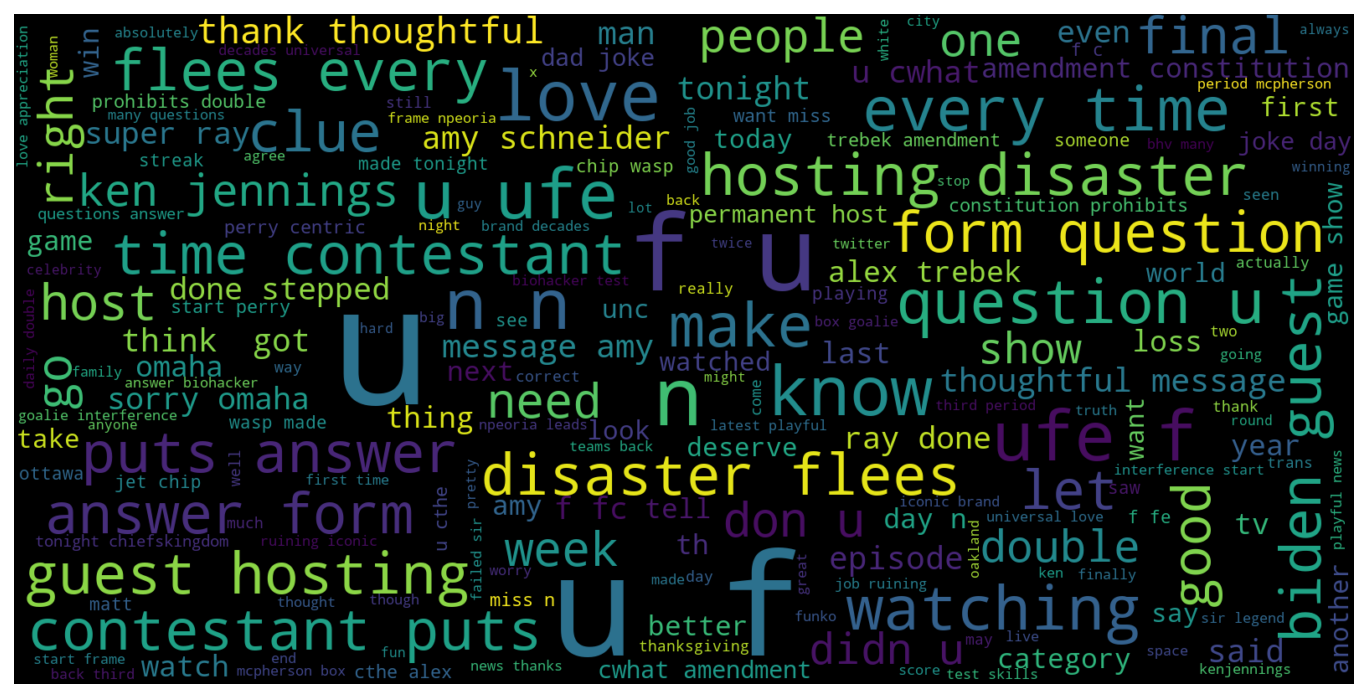

In [598]:
#creating word cloud
plotNegativeCloud(df, 'polarity')
plotPositiveCloud(df, 'polarity')

# Train a model

In [599]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
#Machine learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def drop_unnamed(df):
    df.drop(['Unnamed: 0'], axis=1, inplace = True)
    df.describe()
    df.info()

def drop_na(df) :
    df.dropna(inplace=True)
    df.info()

#drop_unnamed(df)
df[df['fulltweet'].isnull()].count()
drop_na(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 3 to 2229
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   polarity   2229 non-null   float64
 1   tweet_Id   2229 non-null   int64  
 2   date       2229 non-null   object 
 3   fulltweet  2229 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 87.1+ KB


              precision    recall  f1-score   support

         0.0       0.84      0.82      0.83       130
         1.0       0.76      0.78      0.77        93

    accuracy                           0.81       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223

Accuracy Score of Naive Bayes: 0.8071748878923767


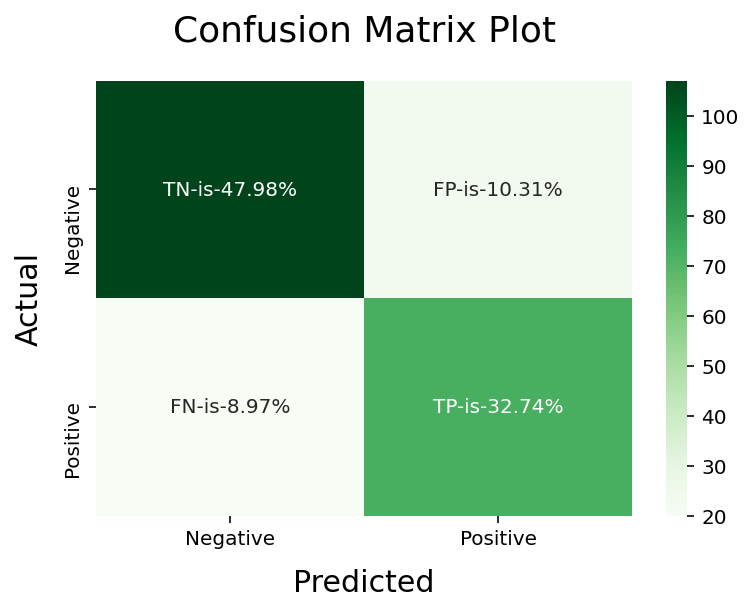

In [600]:
def split_into_training(X,y):
    # Splitting around the 90% data for training and 10% for testing
    return (train_test_split(X,y,test_size = 0.10, random_state =222900))

def evaluate_model_values(model):
# Predict values for Test dataset
    y_pred = model.predict(X_testing)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_testing, y_pred))
    confusion_matrix_plot(y_pred)

# Computation of Confusion matrix
def confusion_matrix_plot(y_pred):
    confusion_matrix_plot = confusion_matrix(y_testing, y_pred)
    categories = ['Negative','Positive']
    matrix_group_names = ['TN','FP', 'FN','TP']
    matrix_group_percentages = ['{0:.2%}'.format(value) for value in confusion_matrix_plot.flatten() / np.sum(confusion_matrix_plot)]
    labels = [f'{v1}-is-{v2}' for v1, v2 in zip( matrix_group_names,matrix_group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(confusion_matrix_plot, annot = labels, cmap = 'Greens',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted", fontdict = {'size':15}, labelpad = 10)
    plt.ylabel("Actual" , fontdict = {'size':15}, labelpad = 10)
    plt.title ("Confusion Matrix Plot", fontdict = {'size':18}, pad = 20)

X=df.fulltweet
y=df.polarity
X_training, X_testing, y_training, y_testing = split_into_training(X,y)

vectorize_train_test = TfidfVectorizer(ngram_range=(1,2), max_features=1000)
vectorize_train_test.fit(X_training)
X_training = vectorize_train_test.transform(X_training)
X_testing  = vectorize_train_test.transform(X_testing)

# Training Naive Bayes model
NB_model = MultinomialNB()
NB_model.fit(X_training, y_training)
evaluate_model_values(NB_model)
y_predict1 = NB_model.predict(X_testing)
print('Accuracy Score of Naive Bayes:',accuracy_score(y_testing, y_predict1))

              precision    recall  f1-score   support

         0.0       0.93      0.81      0.86       130
         1.0       0.77      0.91      0.84        93

    accuracy                           0.85       223
   macro avg       0.85      0.86      0.85       223
weighted avg       0.86      0.85      0.85       223

Accuracy Score of LogisticRegression: 0.852017937219731


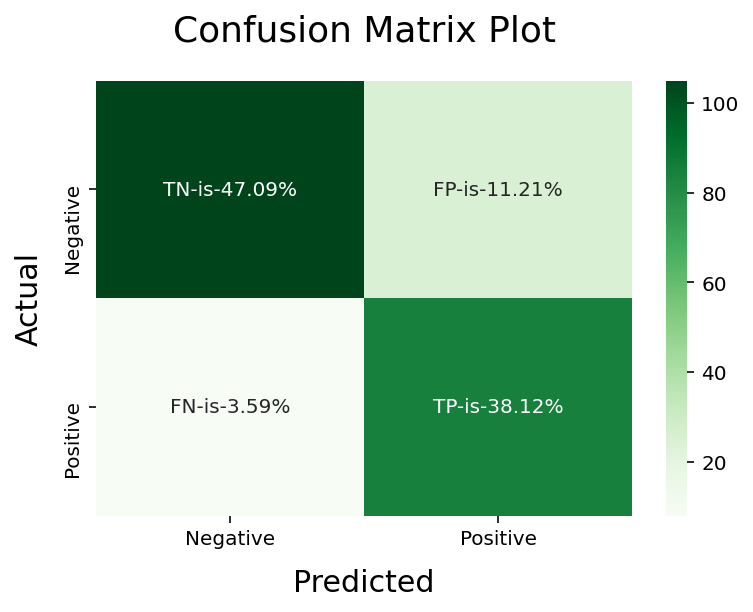

In [601]:
# Training Logistic Regression model
LogisticR_model = LogisticRegression(solver='lbfgs')
LogisticR_model.fit(X_training, y_training)
evaluate_model_values(LogisticR_model)
y_predict2 = LogisticR_model.predict(X_testing)
print('Accuracy Score of LogisticRegression:',accuracy_score(y_testing, y_predict2))

Above confusion matrix shows Naive Bayes model with 80% accuracy and Logistic Regression model with 82% accuracy

# Predictions for given a file using above trained models

In [637]:
my_file_predict=open('Jeopardy_2021_12_07', 'r')

In [638]:
new_df = ppAnyLoadToDF(my_file_predict)
new_df_temp = new_df
new_df.shape[0]

129

In [639]:
ppCombineToFullLen(new_df)
new_df.sample(5)

tweet_Id                      date  \
57   1468056262885715981  2021-12-07T03:14:22.000Z   
7    1468052228653170692  2021-12-07T02:58:21.000Z   
115  1468060248443396096  2021-12-07T03:30:13.000Z   
119  1468060480421785603  2021-12-07T03:31:08.000Z   
13   1468053032868929538  2021-12-07T03:01:32.000Z   

                                             fulltweet  
57   @demers_matthew @seapherkrun Although she did ...  
7             Another article. https://t.co/kfTaCSLmFb  
115  RT @Jeopardy: I can\u2019t give you the moon b...  
119  Get ready for tomorrow\u2019s @Jeopardy with m...  
13   @kevinghannah Definitely Ken by a wide margin....

In [640]:
ppAddPreLen(new_df)
new_df.sample(5)

tweet_Id                      date  \
112  1468060108852641792  2021-12-07T03:29:39.000Z   
40   1468054946998149121  2021-12-07T03:09:09.000Z   
87   1468058313371783169  2021-12-07T03:22:31.000Z   
38   1468054812977631235  2021-12-07T03:08:37.000Z   
76   1468057631671603205  2021-12-07T03:19:49.000Z   

                                             fulltweet  pre_length  
112  RT @_thejeopardyfan: After Double #Jeopardy:\n...         148  
40                    @boogerbrain567 @Jeopardy Lol NO          32  
87   @GOPLeader @DevinNunes Hate to say it but we a...         173  
38        @Cheribi85798244 @Jeopardy Fuck. That. Shit.          44  
76   RT @HowardU: Tune in TOMORROW Dec. 7th! HU\u20...         146

In [641]:
#Remove punctuations in new file
ppRemovePunct(new_df)

polarity             tweet_Id                      date  \
3          1.0  1462978165878394886  2021-11-23T02:55:50.000Z   
4          1.0  1462978259759644680  2021-11-23T02:56:12.000Z   
5          1.0  1462978417138225157  2021-11-23T02:56:50.000Z   
6          1.0  1462978492887277580  2021-11-23T02:57:08.000Z   
7          1.0  1462978509819756549  2021-11-23T02:57:12.000Z   
...        ...                  ...                       ...   
2224       0.0  1459363908624556033  2021-11-13T03:34:04.000Z   
2226       0.0  1459363935317110793  2021-11-13T03:34:10.000Z   
2227       0.0  1459363992984383490  2021-11-13T03:34:24.000Z   
2228       0.0  1459364126074060805  2021-11-13T03:34:55.000Z   
2229       0.0  1459364140045066241  2021-11-13T03:34:59.000Z   

                                              fulltweet  
3              tune watch amy continue rep oakland week  
4     millennia evolution technological development ...  
5       latest playful news thanks thejeopardyfan funko  
6               didn u make final absolutely would kill  
7                         thanks replying champion matt  
...                                                 ...  
2224                                          keep name  
2226                                          keep name  
2227  trouble n ncaught sexual molestation naccident...  
2228                                          keep name  
2229                    much ur boobs weigh music plays  

[2229 rows x 4 columns]

In [642]:
#Clean data in new file
ppAllCleanTweets(new_df)
new_df.sample(5)

cleaned tweets-removed urls,mentions,hashtags,negations,stopwords,lemmatized data, stemming done!


[nltk_data] Downloading package wordnet to /Users/c-ksood/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


tweet_Id                      date  \
97   1468059281014415365  2021-12-07T03:26:22.000Z   
91   1468058576589574149  2021-12-07T03:23:34.000Z   
73   1468057542798368774  2021-12-07T03:19:28.000Z   
126  1468061103376650241  2021-12-07T03:33:36.000Z   
88   1468058350269046786  2021-12-07T03:22:40.000Z   

                                             fulltweet  pre_length  
97   save whale but u ok kill birds bats yep u left...         310  
91   amidst lighthearted football talk think u funn...          78  
73   ohhh oh oh question u answer u cwhat happens s...         241  
126           jet chip wasp made tonight chiefskingdom          89  
88                               thought hilarious u f         288

In [643]:
X_new_file_tweet=new_df.fulltweet

In [644]:
vectorize_data_file = TfidfVectorizer(ngram_range=(1,2), max_features=1000)
vectorize_data_file.fit(X_new_file_tweet)
X_new_file_tweet = vectorize_data_file.transform(X_new_file_tweet)

In [645]:
#predict using Naive Bayes Model
# new_df_temp.drop(['pre_length'], axis=1, inplace=True)
new_df_temp['sentiment_pred'] = NB_model.predict(X_new_file_tweet)

In [646]:
#predict using Logistic Regression Model
new_df_temp['sentiment_pred_LR'] = LogisticR_model.predict(X_new_file_tweet)

In [647]:
#show predicted values on both models in dataframe
new_df_temp[new_df_temp['pre_length']>200]

tweet_Id                      date  \
6    1468052027808763906  2021-12-07T02:57:33.000Z   
9    1468052405900169225  2021-12-07T02:59:03.000Z   
11   1468052893081104390  2021-12-07T03:00:59.000Z   
42   1468055177781522433  2021-12-07T03:10:04.000Z   
47   1468055527544422404  2021-12-07T03:11:27.000Z   
50   1468055747607277570  2021-12-07T03:12:20.000Z   
56   1468056237900140545  2021-12-07T03:14:16.000Z   
57   1468056262885715981  2021-12-07T03:14:22.000Z   
62   1468056818899460096  2021-12-07T03:16:35.000Z   
65   1468056863476441093  2021-12-07T03:16:46.000Z   
73   1468057542798368774  2021-12-07T03:19:28.000Z   
85   1468058071117225987  2021-12-07T03:21:34.000Z   
88   1468058350269046786  2021-12-07T03:22:40.000Z   
90   1468058536206811145  2021-12-07T03:23:24.000Z   
96   1468059176207364096  2021-12-07T03:25:57.000Z   
97   1468059281014415365  2021-12-07T03:26:22.000Z   
99   1468059377944784899  2021-12-07T03:26:45.000Z   
100  1468059439378812928  2021-12-07T03:27:00.000Z   
106  1468059936458477569  2021-12-07T03:28:58.000Z   
109  1468060000392257538  2021-12-07T03:29:13.000Z   
119  1468060480421785603  2021-12-07T03:31:08.000Z   
128  1468061332125589507  2021-12-07T03:34:31.000Z   

                                             fulltweet  pre_length  \
6              didn u make final absolutely would kill         217   
9                            wait everyone makes final         221   
11                               happy help nazi lover         255   
42                                            ih lucuk         314   
47   didn u anticipate fighting life watching famil...         309   
50    gerri tress boothwyn pennsylvania died covid nov         322   
56                                would kill tonight u         288   
57   stone called case u required spill beans but c...         260   
62   update fell asleep couch minutes watching fear...         269   
65   also want someone congratulate solving really ...         230   
73   ohhh oh oh question u answer u cwhat happens s...         241   
85   looks like seminole tribe u monopoly sports be...         210   
88                               thought hilarious u f         288   
90                           double good not even talk         279   
96   trump agenda maga propaganda media goal derail...         280   
97   save whale but u ok kill birds bats yep u left...         310   
99              way men yell watch football yell watch         245   
100           tune watch amy continue rep oakland week         283   
106  trusted first instinct us would gotten finalje...         267   
109            amy schneider oakland watch compete abc         301   
119  tim coupled rosenbaums fingerprints barred eno...         219   
128                                        sorry omaha         306   

     sentiment_pred  sentiment_pred_LR  
6               1.0                0.0  
9               1.0                1.0  
11              0.0                1.0  
42              0.0                1.0  
47              1.0                1.0  
50              1.0                1.0  
56              1.0                1.0  
57              1.0                1.0  
62              1.0                1.0  
65              1.0                1.0  
73              1.0                1.0  
85              1.0                1.0  
88              1.0                1.0  
90              1.0                1.0  
96              1.0                0.0  
97              1.0                1.0  
99              1.0                1.0  
100             0.0                0.0  
106             1.0                1.0  
109             0.0                1.0  
119             1.0                1.0  
128             0.0                0.0

plot word cloud of Negative tweets


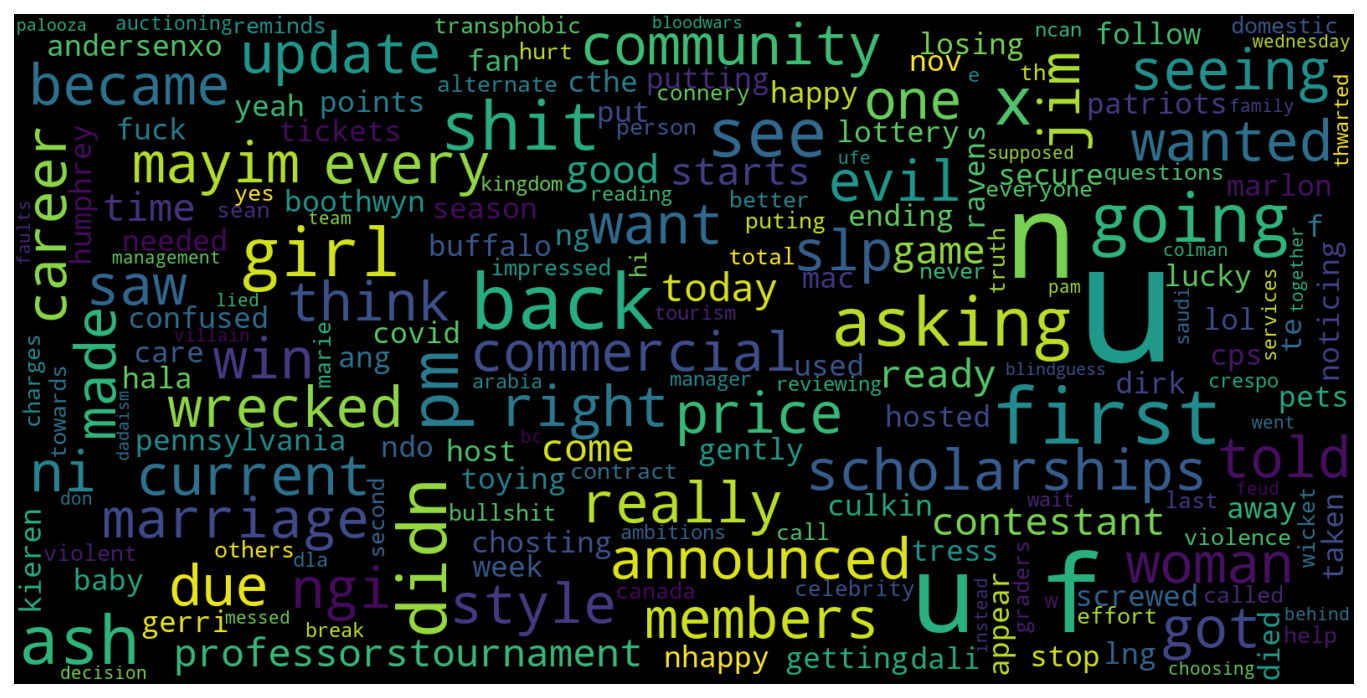

plot word cloud of Negative tweets


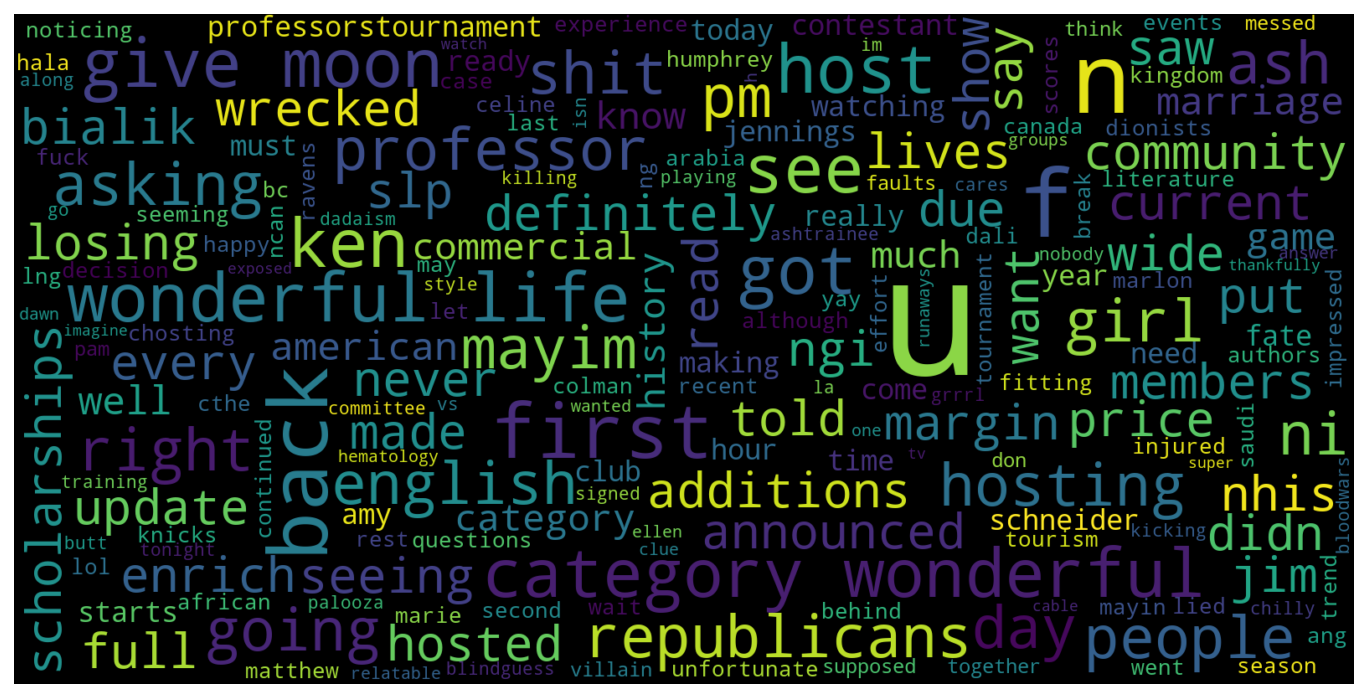

In [565]:
#creating word cloud
plotNegativeCloud(new_df, 'sentiment_pred')
plotNegativeCloud(new_df, 'sentiment_pred_LR')

plot word cloud of Positive tweets


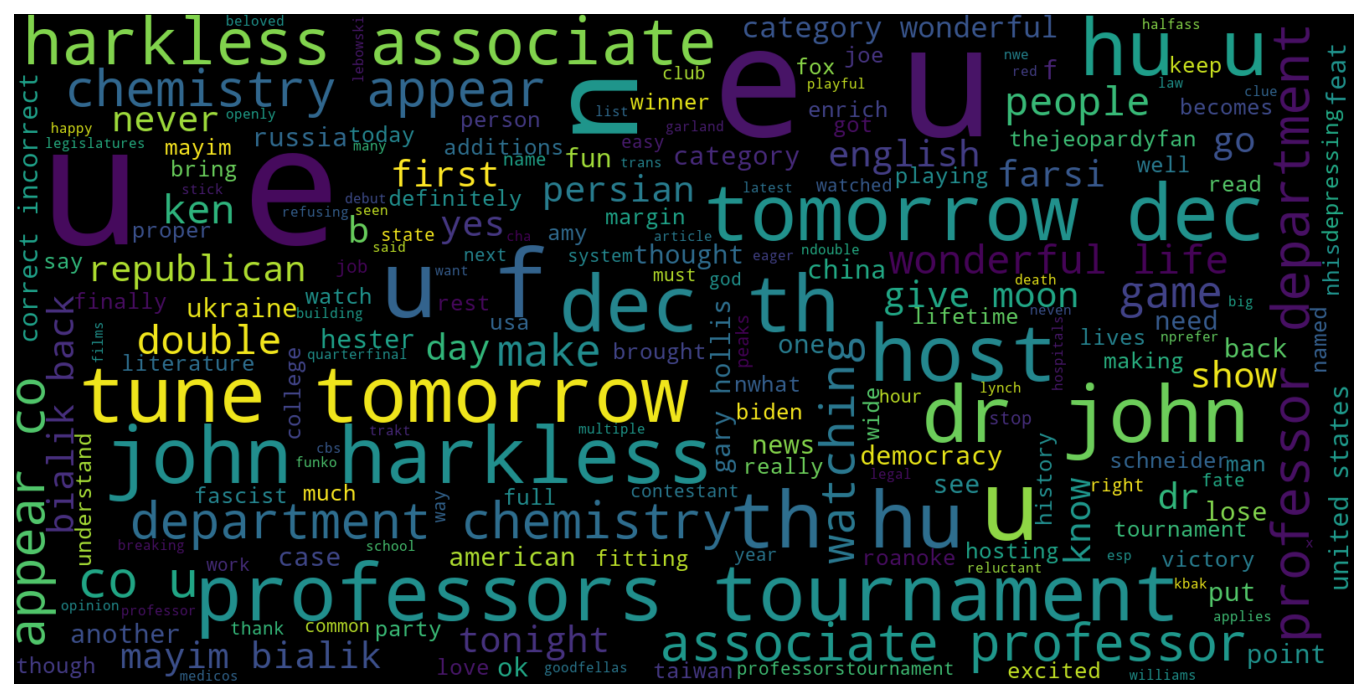

plot word cloud of Positive tweets


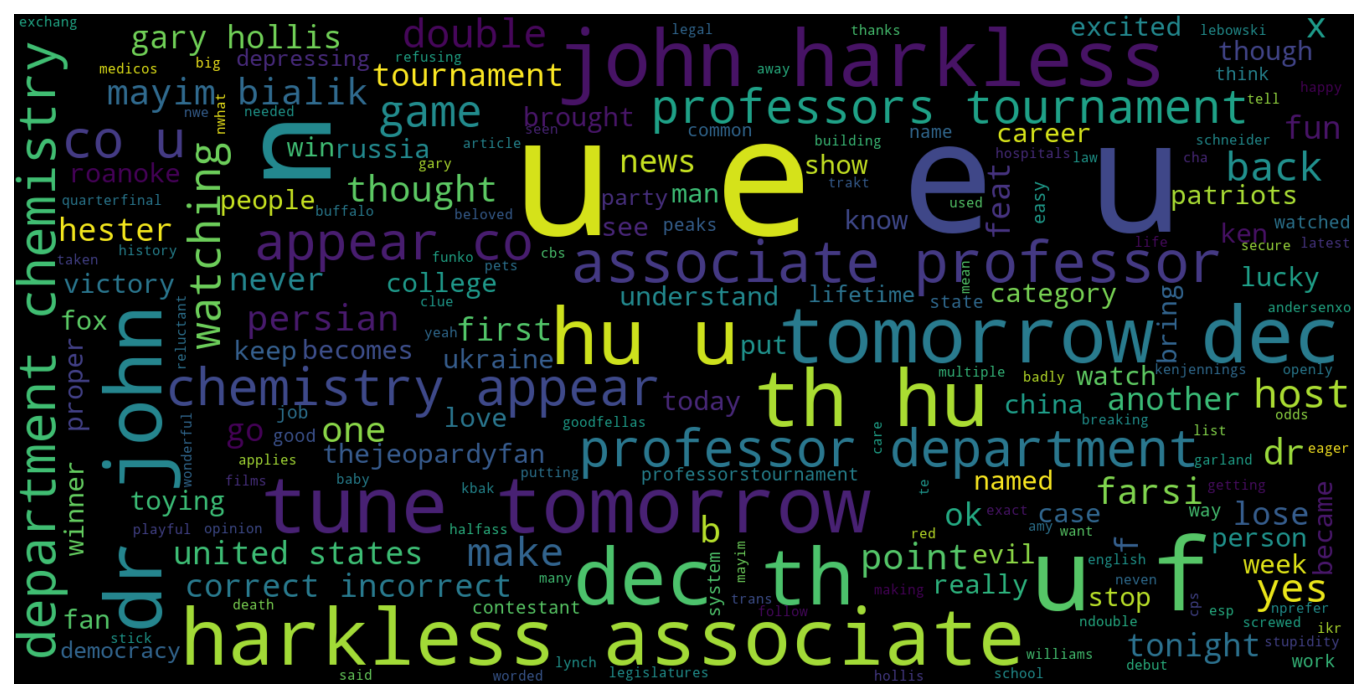

In [566]:
#creating word cloud
plotPositiveCloud(new_df, 'sentiment_pred')
plotPositiveCloud(new_df, 'sentiment_pred_LR')

In [569]:
from joblib import dump, load
dump(NB_model,'Naive_Bayes.joblib')
dump(LogisticR_model,'LogisticR_model.joblib')

['LogisticR_model.joblib']